In [1]:
from codecs import ignore_errors

import kagglehub
import os
import pandas as pd
# Download latest version to the specified directory
path = kagglehub.dataset_download("arshkon/linkedin-job-postings")

#path = "/home/leon/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13"

print(f"Path to dataset files: {path}")
print(f"List of files in the dataset: {os.listdir(path)}")

/Users/yacinebenihaddadene/Documents/School/S8/NLP1/project/NLP_Linkedin_offers/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/yacinebenihaddadene/.cache/kagglehub/datasets/arshkon/linkedin-job-postings/versions/13
List of files in the dataset: ['postings.csv', 'mappings', 'jobs', 'companies']


## Loading raw data

In this section, we wll load raw data from the dataset. We use the `postings.csv` file, which contains job postings from LinkedIn. The dataset includes various features such as company name, job title, description, location, work type, and more. We will also check for missing values in the dataset, to have a first idea of which target variable to choose for our regression task.

In [2]:
postings_raw = pd.read_csv(path + "/postings.csv")

In [3]:
postings_raw

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [4]:
postings_raw.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [5]:
print(f"NaN in company_name: {postings_raw['company_name'].isna().sum()}")
print(f"NaN in title: {postings_raw['title'].isna().sum()}")
print(f"NaN in description: {postings_raw['description'].isna().sum()}")
print(f"NaN in location: {postings_raw['location'].isna().sum()}")
print(f"NaN in work_type: {postings_raw['work_type'].isna().sum()}")
print(f"NaN in company_id: {postings_raw['company_id'].isna().sum()}")
print(f"NaN in normalized_salary: {postings_raw['normalized_salary'].isna().sum()}")
# med salary
print(f"NaN in med_salary: {postings_raw['med_salary'].isna().sum()}")
print(f"NaN in min_salary: {postings_raw['min_salary'].isna().sum()}")
print(f"NaN in max_salary: {postings_raw['max_salary'].isna().sum()}")
print(f"NaN in views: {postings_raw['views'].isna().sum()}")
print(f"NaN in applies: {postings_raw['applies'].isna().sum()}")

NaN in company_name: 1719
NaN in title: 0
NaN in description: 7
NaN in location: 0
NaN in work_type: 0
NaN in company_id: 1717
NaN in normalized_salary: 87776
NaN in med_salary: 117569
NaN in min_salary: 94056
NaN in max_salary: 94056
NaN in views: 1689
NaN in applies: 100529


The observation of NaN values of some important columns of the dataset show the following:
- `company_name`, `title`, `description`, `company_id` and others have little to no NaN values, so as of now we consider that they could be used as features for our regression task, which will be confirmed or not with the feature selection process.
- `views` has not a lot of NaN values compared to the size of the dataset, so it could be used as a target variable for our regression task, will be confirmed or not with the feature selection process.
- `normalized_salary` has a lot of NaN values, but the resulting size should be enough, so it could not be used as a target variable for our regression task, will be confirmed or not with the feature selection process.
- `applies` has a lot of NaN values, but the resulting size should be enough, so it could not be used as a target variable for our regression task, will be confirmed or not with the feature selection process.

## Step 1: Data Preprocessing

### Drop NaN values

In [6]:
postings = postings_raw.copy()
postings.dropna(subset=["company_name", "title", "description", "company_id"], inplace=True)

In [7]:
postings

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [8]:
df_salary = postings[postings["normalized_salary"].notna()]
df_views = postings[postings["views"].notna()]
df_applies = postings[postings["applies"].notna()]

In [9]:
df_salary

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123839,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
123843,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


### Outliers observation and removal

In [10]:
df_salary.describe()

,job_id,max_salary,company_id,views,med_salary,min_salary,applies,original_listed_time,remote_allowed,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code,fips
count,3.556200e+04,2.933700e+04,3.556200e+04,35094.000000,6225.000000,2.933700e+04,8674.000000,3.556200e+04,4754.0,3.556200e+04,1.700000e+02,3.556200e+04,35562.0,3.556200e+04,28826.000000,27023.000000
mean,3.896238e+09,9.224478e+04,1.128010e+07,19.632302,22007.328069,6.510887e+04,11.684113,1.713170e+12,1.0,1.716370e+12,1.713128e+12,1.713219e+12,0.0,2.070082e+05,54492.820752,26416.988380
std,8.406223e+07,7.064583e+05,2.461481e+07,123.970775,52387.406391,4.997638e+05,32.612817,4.741648e+08,0.0,2.679764e+09,4.015683e+08,3.892764e+08,0.0,5.134097e+06,33107.853469,16648.164018
min,9.217160e+05,1.000000e+00,1.009000e+03,1.000000,0.000000,1.000000e+00,1.000000,1.706306e+12,1.0,1.712954e+12,1.712347e+12,1.711317e+12,0.0,0.000000e+00,1002.000000,1003.000000
25%,3.894900e+09,4.867000e+01,1.436300e+04,3.000000,18.860000,3.750000e+01,1.000000,1.712866e+12,1.0,1.715485e+12,1.712671e+12,1.712891e+12,0.0,5.200000e+04,22084.500000,8059.000000
50%,3.901982e+09,8.000000e+04,2.269650e+05,5.000000,25.370000,6.020000e+04,3.000000,1.713398e+12,1.0,1.716045e+12,1.713281e+12,1.713450e+12,0.0,8.184375e+04,55401.000000,26125.000000
75%,3.904573e+09,1.400000e+05,5.323150e+06,10.000000,2500.000000,1.000000e+05,9.000000,1.713478e+12,1.0,1.716090e+12,1.713451e+12,1.713482e+12,0.0,1.250000e+05,90001.000000,39093.000000
max,3.906267e+09,1.200000e+08,1.034565e+08,9975.000000,750000.000000,8.500000e+07,967.000000,1.713573e+12,1.0,1.729125e+12,1.713556e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

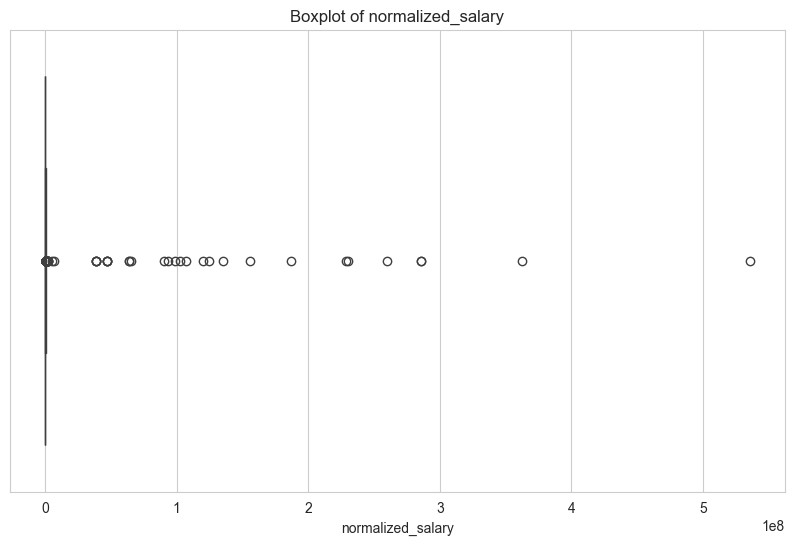

In [12]:
plot_boxplot(df_salary, "normalized_salary")

In [13]:
# Remove outliers
lower_bound = df_salary['normalized_salary'].quantile(0.01)
upper_bound = df_salary['normalized_salary'].quantile(0.99)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")


Lower bound: 134.02500000000003
Upper bound: 300928.99999999936


In [14]:
df_salary_cleaned = df_salary[(df_salary['normalized_salary'] >= lower_bound) & (df_salary['normalized_salary'] <= upper_bound)]

In [15]:
df_salary_cleaned

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713573e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123839,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,NaN,1.713571e+12,NaN,0,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN
123843,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,NaN,1.713572e+12,NaN,0,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0


## Step 2: Feature Engineering

In [19]:
company_stats = df_salary_cleaned.groupby('company_id').agg(
    avg_salary=('normalized_salary', 'mean'),
    total_postings=('job_id', 'count'),
    median_salary=('normalized_salary', 'median')
).reset_index()

In [20]:
df_salary_featured = df_salary_cleaned.copy()
df_salary_featured = df_salary_cleaned.merge(company_stats, on='company_id', how='left')
df_salary_featured['state'] = df_salary_featured['location'].str.extract(r',\s*([A-Z]{2})') # might be useless, but let's keep it for now

In [21]:
df_salary_featured

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,work_type,currency,compensation_type,normalized_salary,zip_code,fips,avg_salary,total_postings,median_salary,state
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,38480.000000,1,38480.0,NJ
1,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,62500.000000,2,62500.0,OH
2,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,157500.000000,1,157500.0,NY
3,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0,35360.000000,1,35360.0,NC
4,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN,180000.000000,1,180000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34845,3906265414,"TalentBurst, an Inc 5000 company",Contract Administrator,"Position: Clinical Contracts Analyst, Req#: 63...",45.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN,97735.529412,17,93600.0,CA
34846,3906266165,Athena Recruiting,Catering Event Manager,This role handles all the onsite catering and ...,65000.0,YEARLY,Greater Indianapolis,3056329.0,3.0,NaN,...,PART_TIME,USD,BASE_SALARY,57500.0,NaN,NaN,57500.000000,1,57500.0,NaN
34847,3906266272,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I (Complaint Invest...,50.0,HOURLY,"Irvine, CA",122451.0,1.0,NaN,...,CONTRACT,USD,BASE_SALARY,83200.0,92602.0,NaN,97735.529412,17,93600.0,CA
34848,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0,133250.000000,10,147500.0,CA


### Step 3: Feature Selection

In [22]:
corr_matrix = df_salary_featured[['views', 'applies', 'med_salary', "avg_salary", "median_salary","normalized_salary"]].corr()


In [23]:
print(corr_matrix['normalized_salary'].sort_values(ascending=False))

normalized_salary    1.000000
avg_salary           0.783946
median_salary        0.764472
med_salary           0.579742
views                0.040165
applies              0.032974
Name: normalized_salary, dtype: float64


In [24]:
print(corr_matrix['views'].sort_values(ascending=False))

views                1.000000
applies              0.472632
med_salary           0.052160
avg_salary           0.047966
median_salary        0.046820
normalized_salary    0.040165
Name: views, dtype: float64


In [25]:
print(corr_matrix['applies'].sort_values(ascending=False))

applies              1.000000
views                0.472632
median_salary        0.033107
normalized_salary    0.032974
avg_salary           0.031718
med_salary          -0.018955
Name: applies, dtype: float64


From the correlation matrix we can see that:
- `normalized_salary` is correlated with `avg_salary`, `median_salary`, `med_salary`, but not `views` and `applies`, where correlation is very low.
- `views` is correlated with `applies`, but not `normalized_salary`, where correlation is very low.
- `applies` is correlated with `views`, but not `normalized_salary`, where correlation is very low.

In [26]:
df_salary_featured.remote_allowed.describe() # variance is very low: we can drop it

count    4619.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: remote_allowed, dtype: float64

In [27]:
print(f"NaN in state: {df_salary_featured['state'].isna().sum()}")

NaN in state: 5921


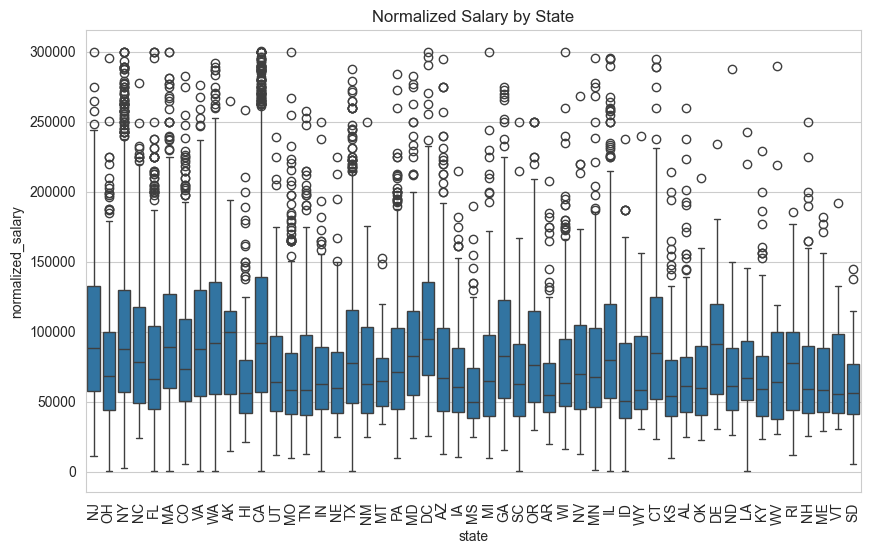

In [28]:
# plot normalized_salary vs state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='normalized_salary', data=df_salary_featured.dropna(subset=["state"]))
plt.title('Normalized Salary by State')
plt.xticks(rotation=90)
plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=9)
X_categorical = pd.get_dummies(df_salary_featured[['work_type', 'formatted_experience_level', "pay_period"]])
selector.fit(X_categorical, df_salary_featured["normalized_salary"])
selected_features = X_categorical.columns[selector.get_support()]

In [30]:
selected_features

Index(['work_type_CONTRACT', 'work_type_FULL_TIME', 'work_type_PART_TIME',
       'formatted_experience_level_Entry level', 'pay_period_BIWEEKLY',
       'pay_period_HOURLY', 'pay_period_MONTHLY', 'pay_period_WEEKLY',
       'pay_period_YEARLY'],
      dtype='object')

#### random forest feature importance

## Complete rundown

In [83]:
import category_encoders as ce


def feature_engineer(df: pd.DataFrame, state=True, compute_company_stats=True) -> pd.DataFrame:
    """
    Feature engineer the input DataFrame to be ready for ML modeling.
    Args:
        df: pd.DataFrame: The input DataFrame to transform.
        state: bool: Whether to extract state from location.
        compute_company_stats: bool: Whether to compute company statistics.

    Returns:
        pd.DataFrame: The transformed DataFrame.

    """
    if state:
        df['state'] = df['location'].str.extract(r',\s*([A-Z]{2})')
    if compute_company_stats:
        company_stats = df.groupby('company_id').agg(
            avg_salary=('normalized_salary', 'mean'),
            total_postings=('job_id', 'count'),
            median_salary=('normalized_salary', 'median')
        ).reset_index()
        # Merge company stats into the original DataFrame
        df = df.merge(company_stats, on='company_id', how='left')

    return df


def build_feature_matrix(df: pd.DataFrame, target_encoder_cols:list[str]=None, one_hot_encoder_cols:list[str]=None, numerical_cols:list[str]=None,text_cols:list[(str,object)]=None, scaler=None, target="normalized_salary") -> pd.DataFrame:
    """
    Build the feature matrix for the regression task.

    Args:
        numerical_cols:
        df (pd.DataFrame): The input DataFrame.
        target_encoder_cols (list[str]): List of columns to be target encoded.
        one_hot_encoder_cols (list[str]): List of columns to be one-hot encoded.
        text_cols (list[(str,object)]): List of tuples containing the column name and the vectorizer to be used.
        scaler (object): Scaler object to be used for scaling the features.
        target (str): The target variable to be predicted.

    Returns:
        pd.DataFrame: The feature matrix.
    """
    # Extract target variable
    y = df[target]

    if target_encoder_cols is None:
        target_encoder_cols = ["state", "company_id"]
    if one_hot_encoder_cols is None:
        one_hot_encoder_cols = ["work_type", "formatted_experience_level", "pay_period", "compensation_type"]
    if text_cols is None:
        text_cols = [("title", TfidfVectorizer(max_features=100, stop_words="english")), ("description", TfidfVectorizer(max_features=100, stop_words="english"))]


    if numerical_cols is None:
        numerical_cols = ["avg_salary", "total_postings", "median_salary"]
    elif numerical_cols not in df.columns:
        raise ValueError(f"Numerical columns {numerical_cols} not found in the DataFrame.")




    # Encode categorical features
    encoder = ce.TargetEncoder(cols=target_encoder_cols)
    target_encoded = encoder.fit_transform(
        df[target_encoder_cols], y
    )

    # One-hot encode low-cardinality features
    one_hot_encoded = pd.get_dummies(df[one_hot_encoder_cols], columns=one_hot_encoder_cols)

    # TF-IDF for text columns
    text_features = []
    for col, vectorizer in text_cols:
        text_vectorized = vectorizer.fit_transform(df[col]).toarray()
        text_features.append(pd.DataFrame(text_vectorized, columns=[f"{col}_{i}" for i in range(text_vectorized.shape[1])]))


    # Combine all features
    X = pd.concat([target_encoded, one_hot_encoded, df[numerical_cols]] + text_features, axis=1)

    if scaler is not None:
        X = scaler.fit_transform(X, columns=X.columns)
    return X


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

build_feature_matrix(feature_engineer(df_salary_cleaned), target_encoder_cols=["state", "company_id"], one_hot_encoder_cols=["work_type", "formatted_experience_level", "pay_period", "compensation_type"], text_cols=[("title", TfidfVectorizer(max_features=100, stop_words="english")), ("description", TfidfVectorizer(max_features=100, stop_words="english"))], scaler=None, target="normalized_salary")

/var/folders/1n/x9m2wrts3jlgydhr47yh35z40000gn/T/ipykernel_92953/2441233028.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['location'].str.extract(r',\s*([A-Z]{2})')


,state,company_id,work_type_CONTRACT,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,work_type_TEMPORARY,work_type_VOLUNTEER,formatted_experience_level_Associate,...,description_90,description_91,description_92,description_93,description_94,description_95,description_96,description_97,description_98,description_99
0,97535.300187,86418.217642,False,True,False,False,False,False,False,False,...,0.341444,0.00000,0.0,0.232450,0.000000,0.0,0.188197,0.176777,0.112899,0.073079
1,77221.121515,89178.366364,False,True,False,False,False,False,False,False,...,0.000000,0.00000,0.0,0.239611,0.000000,0.0,0.000000,0.000000,0.000000,0.225990
2,99734.452797,101903.728261,False,True,False,False,False,False,False,False,...,0.233307,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.124836
3,88226.377267,86012.279202,False,False,True,False,False,False,False,False,...,0.128994,0.00000,0.0,0.097575,0.000000,0.0,0.118499,0.055654,0.000000,0.000000
4,110742.962518,104831.168934,True,False,False,False,False,False,False,False,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34845,104195.580948,95353.167658,True,False,False,False,False,False,False,False,...,0.078126,0.13361,0.0,0.000000,0.000000,0.0,0.071769,0.000000,0.000000,0.083606
34846,110742.962518,88892.880825,False,False,False,False,True,False,False,True,...,0.000000,0.00000,0.0,0.223629,0.299318,0.0,0.000000,0.000000,0.651688,0.000000
34847,104195.580948,95353.167658,True,False,False,False,False,False,False,False,...,0.000000,0.13001,0.0,0.000000,0.000000,0.0,0.069836,0.000000,0.000000,0.081353
34848,104195.580948,104254.952525,False,True,False,False,False,False,False,False,...,0.198344,0.00000,0.0,0.000000,0.000000,0.0,0.364412,0.128362,0.000000,0.106128


In [48]:
X,y = df_salary_featured.drop(columns=["normalized_salary"]), df_salary_featured["normalized_salary"]

In [49]:
import category_encoders as ce

In [50]:
encoder = ce.TargetEncoder(cols=['state', 'company_id'])
X[['state_encoded', 'company_id_encoded']] = encoder.fit_transform(
    X[['state', 'company_id']], y
)

In [51]:
# One-hot encode low-cardinality features
X = pd.get_dummies(X, columns=[
    'work_type',
    'formatted_experience_level',
    'pay_period',
    'compensation_type'
])

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF for job titles and descriptions
tfidf_title = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_desc = TfidfVectorizer(max_features=100, stop_words='english')

# Transform text columns
title_features = tfidf_title.fit_transform(X['title']).toarray()
desc_features = tfidf_desc.fit_transform(X['description']).toarray()

# Convert to DataFrames
title_df = pd.DataFrame(title_features, columns=[f"title_{i}" for i in range(100)])
desc_df = pd.DataFrame(desc_features, columns=[f"desc_{i}" for i in range(100)])

# Combine with main dataframe
X = pd.concat([X, title_df, desc_df], axis=1)

In [53]:
X = X.drop(columns=[
    'job_id', 'company_name', 'title', 'description', 'location',
    'company_id', 'job_posting_url', 'application_url', 'skills_desc',
    'listed_time', 'closed_time', 'zip_code', 'fips', 'currency', "views",
    "max_salary", "min_salary", "med_salary", "applies", "formatted_work_type",
    "original_listed_time", "remote_allowed", "application_type", "expiry", "posting_domain",
    "sponsored", "state",
])

In [54]:
X

,avg_salary,total_postings,median_salary,state_encoded,company_id_encoded,work_type_CONTRACT,work_type_FULL_TIME,work_type_INTERNSHIP,work_type_OTHER,work_type_PART_TIME,...,desc_90,desc_91,desc_92,desc_93,desc_94,desc_95,desc_96,desc_97,desc_98,desc_99
0,38480.000000,1,38480.0,97535.300187,86418.217642,False,True,False,False,False,...,0.341444,0.00000,0.0,0.232450,0.000000,0.0,0.188197,0.176777,0.112899,0.073079
1,62500.000000,2,62500.0,77221.121515,89178.366364,False,True,False,False,False,...,0.000000,0.00000,0.0,0.239611,0.000000,0.0,0.000000,0.000000,0.000000,0.225990
2,157500.000000,1,157500.0,99734.452797,101903.728261,False,True,False,False,False,...,0.233307,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.124836
3,35360.000000,1,35360.0,88226.377267,86012.279202,False,False,True,False,False,...,0.128994,0.00000,0.0,0.097575,0.000000,0.0,0.118499,0.055654,0.000000,0.000000
4,180000.000000,1,180000.0,110742.962518,104831.168934,True,False,False,False,False,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34845,97735.529412,17,93600.0,104195.580948,95353.167658,True,False,False,False,False,...,0.078126,0.13361,0.0,0.000000,0.000000,0.0,0.071769,0.000000,0.000000,0.083606
34846,57500.000000,1,57500.0,110742.962518,88892.880825,False,False,False,False,True,...,0.000000,0.00000,0.0,0.223629,0.299318,0.0,0.000000,0.000000,0.651688,0.000000
34847,97735.529412,17,93600.0,104195.580948,95353.167658,True,False,False,False,False,...,0.000000,0.13001,0.0,0.000000,0.000000,0.0,0.069836,0.000000,0.000000,0.081353
34848,133250.000000,10,147500.0,104195.580948,104254.952525,False,True,False,False,False,...,0.198344,0.00000,0.0,0.000000,0.000000,0.0,0.364412,0.128362,0.000000,0.106128


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R²: {r2_score(y_test, y_pred)}")

MAE: 14606.224798355486
RMSE: 23732.84050038262
R²: 0.7834407470817417


In [57]:
# lets use linear regression for comparison
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', 'passthrough', X.select_dtypes(include=['object']).columns)
    ],
    remainder='drop'
)
# Create a pipeline
pipeline = make_pipeline(
    preprocessor,
    LinearRegression()
)

# Fit the model
pipeline.fit(X_train, y_train)
# Predictions
y_pred_linear = pipeline.predict(X_test)
# Evaluate
print(f"MAE: {mean_absolute_error(y_test, y_pred_linear)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_linear))}")
print(f"R²: {r2_score(y_test, y_pred_linear)}")

MAE: 19471.267959238387
RMSE: 27371.720933964163
R²: 0.7119409589457488


In [58]:
#cross validation for random forest
from sklearn.model_selection import cross_val_score, cross_validate
cv_scores = cross_validate(model, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")

Cross-validated MAE: 16208.276000681606
Cross-validated RMSE: 25715.981862966935
Cross-validated R²: 0.7485913882994578


In [ ]:
# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)
print("Top Features:\n", top_features)



Top Features:
 company_id_encoded                             0.484774
pay_period_YEARLY                              0.047145
title_28                                       0.016300
formatted_experience_level_Mid-Senior level    0.014963
state_encoded                                  0.014576
formatted_experience_level_Director            0.014272
formatted_experience_level_Entry level         0.010821
formatted_experience_level_Executive           0.008848
desc_7                                         0.008547
desc_20                                        0.007326
desc_31                                        0.007028
desc_19                                        0.006214
desc_14                                        0.006064
formatted_experience_level_Associate           0.005942
desc_96                                        0.005888
desc_6                                         0.005489
desc_99                                        0.005437
desc_18                          

In [85]:
new_X = build_feature_matrix(feature_engineer(df_salary_cleaned), target_encoder_cols=["state", "company_id"], one_hot_encoder_cols=["work_type", "formatted_experience_level", "pay_period", "compensation_type"], text_cols=[("title", TfidfVectorizer(max_features=100, stop_words="english")), ("description", TfidfVectorizer(max_features=100, stop_words="english"))], scaler=None, target="normalized_salary")
new_y = df_salary_featured["normalized_salary"]

/var/folders/1n/x9m2wrts3jlgydhr47yh35z40000gn/T/ipykernel_92953/2441233028.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['location'].str.extract(r',\s*([A-Z]{2})')


In [86]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=30, random_state=42)
model.fit(new_X_train, new_y_train)
# Predictions
y_pred = model.predict(new_X_test)
# Evaluate
print(f"MAE: {mean_absolute_error(new_y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(new_y_test, y_pred))}")
print(f"R²: {r2_score(new_y_test, y_pred)}")


MAE: 14559.638169442205
RMSE: 23747.056890445845
R²: 0.7831812237510822


In [68]:
cv_scores = cross_validate(model, new_X, new_y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])

In [69]:
print(f"Cross-validated MAE: {-cv_scores['test_neg_mean_absolute_error'].mean()}")
print(f"Cross-validated RMSE: {np.sqrt(-cv_scores['test_neg_mean_squared_error'].mean())}")
print(f"Cross-validated R²: {cv_scores['test_r2'].mean()}")

Cross-validated MAE: 18843.727382834048
Cross-validated RMSE: 28455.652219129886
Cross-validated R²: 0.6916247389903225
